In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
pclass_crosstab=pd.crosstab(df.Pclass,df.Survived)

In [7]:
pclass_crosstab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [8]:
pclass_pct=pclass_crosstab.div(pclass_crosstab.sum(1).astype(float) , axis=0)
pclass_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


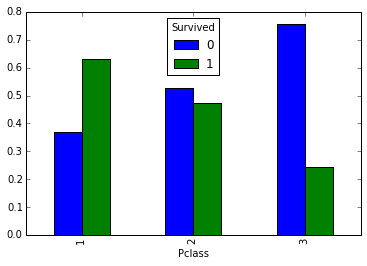

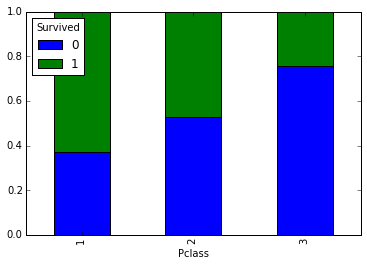

In [9]:
pclass_pct.plot(kind='bar')
pclass_pct.plot(kind='bar',stacked=True)

In [10]:
gend_mapping = dict(zip(np.sort(df.Sex.unique()), range(len(df.Sex.unique()))))
gend_mapping

{'female': 0, 'male': 1}

In [11]:
df['gend_map']= df.Sex.map(gend_mapping).astype(int)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gend_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [12]:
gend_crosstab = pd.crosstab(df.gend_map , df.Survived)
gend_pct = gend_crosstab.div(gend_crosstab.sum(1).astype(float) , axis=0)


In [13]:
gend_crosstab
gend_pct

Survived,0,1
gend_map,,
0,0.257962,0.742038
1,0.811092,0.188908


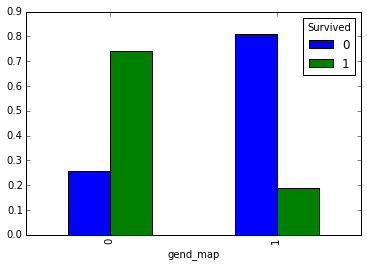

In [14]:
gend_pct.plot(kind='bar')

In [15]:
#count number of males and females in each class
uniq_pclass = df.Pclass.unique()
print(uniq_pclass)
print("Males in 1st class : ",len(df[(df.Sex == 'male') & (df.Pclass == 1)]))
print("Females in 1st class : ",len(df[(df.Sex == 'female') & (df.Pclass == 1)]))
print("Males in 2nd class : ",len(df[(df.Sex == 'male') & (df.Pclass == 2)]))
print("Females in 2nd class : ",len(df[(df.Sex == 'female') & (df.Pclass == 2)]))
print("Males in 3rd class : ",len(df[(df.Sex == 'male') & (df.Pclass == 3)]))
print("Females in 3rd class : ",len(df[(df.Sex == 'female') & (df.Pclass == 3)]))
#for p_class in uniq_pclass :

[3 1 2]
Males in 1st class :  122
Females in 1st class :  94
Males in 2nd class :  108
Females in 2nd class :  76
Males in 3rd class :  347
Females in 3rd class :  144
